**Problem : Corona-Virus(COVID-19)**

---
Coronavirus disease (COVID-19) is an infectious disease caused by the SARS-CoV-2 virus. Many people infected with the virus and experienced mild to moderate respiratory illness and recovered without requiring special treatment. However, some will become seriously ill and require medical attention. Dataset related to this virus has been analysed to find out the latent relationship among different wave, mortality and infection rate of several countries. This analysis may help to prepare our country for next wave or any other fatal disease..

**DataSet :** I have collect this dataset from **ourworlddata.org** to analysis the COVID details from January 2020 to till now.

**Data Analysis**

**Language :Python**

Python is a high-level, general-purpose programming language. Its design philosophy emphasizes code readability with the use of significant indentation. Its language constructs and object-oriented approach aim to help programmers write clear, logical code for small- and large-scale projects.



**Packages Used :** Numpy , Pandas , Matplotlib , Seaborn

**Numpy:** NumPy is a Python library used for working with arrays. It also has functions for working in domain of linear algebra, fourier transform, and matrices.

**Pandas:** Pandas is a Python library for data analysis. Pandas' primary data structures are DataFrames, which make it easier to perform analytical tasks in Python.

**Matplotlib :** Matplotlib is one of the most popular Python packages used for data visualization. It is a cross-platform library for making 2D plots from data in arrays.

**Seaborn :** Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots

import folium

import seaborn as sns
# Set style & figures inline
sns.set()
%matplotlib inline

import math
import random
from datetime import timedelta
from dateutil.parser import parse

import warnings
warnings.filterwarnings('ignore')

#color pallette
cnf = '#393e46'
dth = '#ff2e63'
rec = '#21bf73'
act = '#fe9801'

# Dataset Preparation

In [2]:
import plotly as py
py.offline.init_notebook_mode(connected = True)

# **WORLD TOTAL WAVE ANALYSIS**

Here I have shown the sample of World detail of COVID-19 which includes the iso-code,continent ,location-country,date wise total cases , total deaths, facilities details etc.. 

In [3]:
orig_df = pd.read_csv('https://covid.ourworldindata.org/data/owid-covid-data.csv')
display(orig_df.head())

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


**Infected Cases :** I have selected date and total_cases column to show the infected cases date wise.

In [4]:
wave_total = orig_df[['date', 'total_cases']]
display(wave_total.tail())

,date,total_cases
192783,2022-06-05,253338.0
192784,2022-06-06,253508.0
192785,2022-06-07,253637.0
192786,2022-06-08,253779.0
192787,2022-06-09,253779.0


**parse :** This module offers a generic date/time string parser which is able to parse most known formats to represent a date and/or time.

# Number of confirmed cases of Continent

In [5]:
dftotal=orig_df['continent'].value_counts()
dftotal

Africa           44698
Europe           41983
Asia             41507
North America    29922
Oceania          12709
South America    10765
Name: continent, dtype: int64

In [6]:
orig_df['continent'].describe()

count     181584
unique         6
top       Africa
freq       44698
Name: continent, dtype: object

In [7]:
confirmed_continent=orig_df.groupby(['continent']).sum()
confirmed_continent

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
continent,,,,,,,,,,,,,,,,,,,,,
Africa,4.326186e+09,11909134.0,1.188966e+07,103637345.0,254187.0,253757.333,4.361659e+08,1.498769e+06,1.493740e+06,6.169918e+06,...,75846.8,806282.8,908964.724,49238.580,2878077.20,24275.691,18984891.6,2040.49,4091.22,2.674584e+05
Asia,4.216497e+10,153591394.0,1.531783e+08,547404541.0,1430953.0,1427740.657,1.298901e+09,5.290891e+06,5.270437e+06,1.096860e+07,...,153004.7,1266319.5,1520292.115,114515.760,3080363.13,28850.943,18093743.3,7775.32,13797.12,5.547531e+05
Europe,4.645189e+10,199587189.0,1.985472e+08,736798152.0,1844829.0,1840411.822,3.723961e+09,1.613207e+07,1.607639e+07,4.571989e+07,...,786062.1,1193746.6,233620.689,186210.317,3209489.13,31042.958,87733213.6,26302.43,48586.16,4.662861e+06
North America,3.236003e+10,100772617.0,1.003381e+08,620534921.0,1445747.0,1443181.177,1.208158e+09,5.678110e+06,5.631503e+06,1.422029e+07,...,75998.7,222979.1,833324.077,43898.260,2297232.75,14378.057,101256317.4,7900.93,13211.63,7.421509e+05
Oceania,8.708874e+08,9146761.0,8.969364e+06,2279263.0,12931.0,12689.588,2.596788e+08,2.006550e+06,1.989310e+06,1.738925e+06,...,99532.1,201393.3,99326.461,15458.770,936333.55,5424.171,-346302.0,-576.15,255.06,-4.311547e+04
South America,2.086726e+10,58092698.0,5.780569e+07,590857295.0,1275946.0,1274386.998,4.977723e+08,1.988659e+06,1.977839e+06,1.311374e+07,...,82680.5,164986.8,326241.216,20811.740,813675.15,7614.604,47322109.9,21490.13,23289.68,1.289004e+06


In [8]:
confirmed_continent.index

Index(['Africa', 'Asia', 'Europe', 'North America', 'Oceania',
       'South America'],
      dtype='object', name='continent')

In [9]:
# poi=['Africa', 'Asia', 'Europe', 'North America', 'Oceania','South America']
# confirmed_continent['poi'].plot(figsize=(20,10), linewidth=5, colormap='brg', fontsize=20);

Text(0.5, 1.0, 'World Covid Infected Cases')

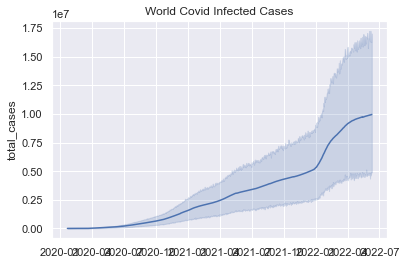

In [10]:
from dateutil.parser import parse
date_str1 = wave_total['date'].values
date_arr = []
for i in range(len(date_str1)):
    date_arr.append(parse(date_str1[i]))
sns.lineplot(x = date_arr  , y = wave_total["total_cases"], data = wave_total)
sns.set(rc={'figure.figsize':(10,10)})
plt.title("World Covid Infected Cases")


## Recover vs Death plot

## WORLD COVID FIRST WAVE 

In [11]:
world_first_wave = orig_df.loc[(orig_df['date'] >='2020-03-22') & (orig_df['date'] < '2021-05-01')]
# first_wave.tail()

totalcases = world_first_wave['total_cases'].replace(np.nan,0).to_numpy(np.int64)//1000
# print(totalcases)

In [12]:
wfw = world_first_wave[['date', 'total_cases']]
wfw.tail()

,date,total_cases
192378,2021-04-26,38102.0
192379,2021-04-27,38164.0
192380,2021-04-28,38191.0
192381,2021-04-29,38235.0
192382,2021-04-30,38257.0


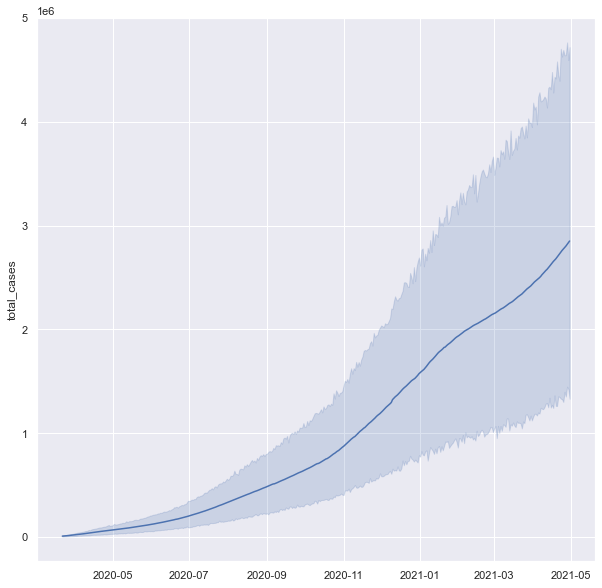

In [13]:

date_str3 = wfw['date'].values
date_arr3 = []
for i in range(len(date_str3)):
    date_arr3.append(parse(date_str3[i]))
sns.lineplot(x = date_arr3  , y = wfw["total_cases"], data = wfw)
sns.set(rc={'figure.figsize':(10,10)})

# **WORLD SECOND WAVE**:

In [14]:
world_second_wave =orig_df.loc[(orig_df['date'] >='2021-06-01') & (orig_df['date'] < '2021-12-31')]
# first_wave.tail()
totalcases1 = world_second_wave['total_cases'].replace(np.nan,0).to_numpy(np.int64)//1000
# print(totalcases)

In [15]:
wsw = world_second_wave[['date', 'total_cases']]
wsw.tail()

,date,total_cases
192622,2021-12-26,204351.0
192623,2021-12-27,205449.0
192624,2021-12-28,207548.0
192625,2021-12-29,207548.0
192626,2021-12-30,211728.0


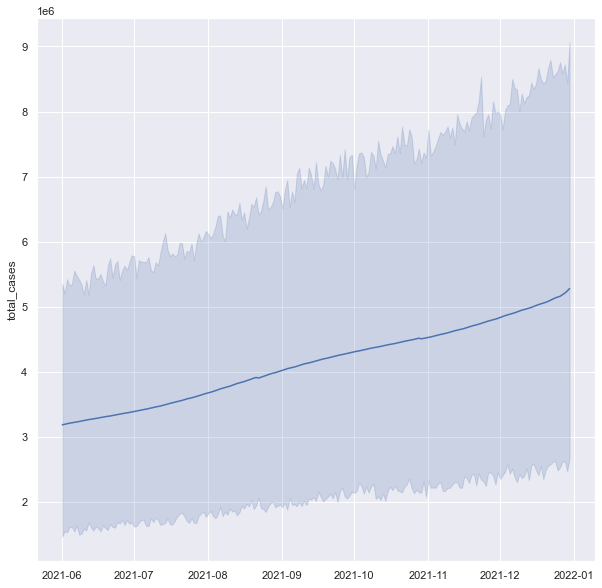

In [16]:

date_str4 = wsw['date'].values
date_arr4 = []
for i in range(len(date_str4)):
    date_arr4.append(parse(date_str4[i]))
sns.lineplot(x = date_arr4  , y = wsw["total_cases"], data = wsw)
sns.set(rc={'figure.figsize':(10,10)})

# **WORLD THIRD WAVE**

In [17]:
world_third_wave =orig_df.loc[(orig_df['date'] >='2022-01-01') & (orig_df['date'] < '2022-3-15')]
# first_wave.tail()
totalcases1 = world_third_wave['total_cases'].replace(np.nan,0).to_numpy(np.int64)//1000
# print(totalcases)

In [18]:
wtw = world_third_wave[['date', 'total_cases']]
wtw.tail()

,date,total_cases
192783,2022-06-05,253338.0
192784,2022-06-06,253508.0
192785,2022-06-07,253637.0
192786,2022-06-08,253779.0
192787,2022-06-09,253779.0


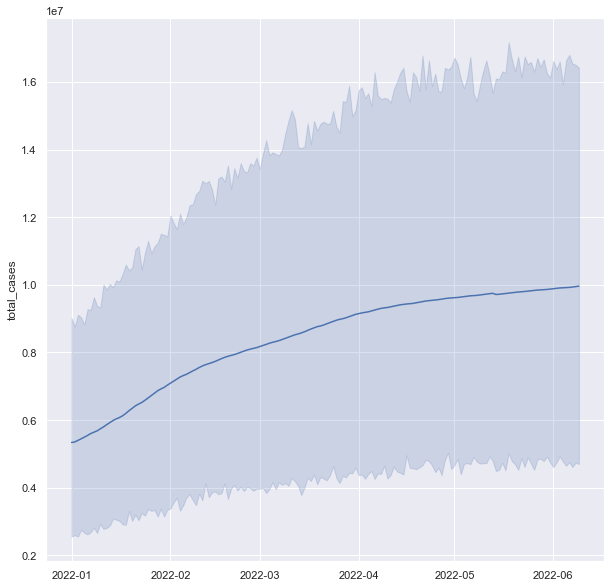

In [19]:
date_str4 = wtw['date'].values
date_arr4 = []
for i in range(len(date_str4)):
    date_arr4.append(parse(date_str4[i]))
sns.lineplot(x = date_arr4  , y = wtw["total_cases"], data = wtw)
sns.set(rc={'figure.figsize':(10,10)})

# **CONTINENT WAVE ANALYSIS**

In [20]:
#df_continent = orig_df.loc[orig_df['continent'].str.contains('Asia',na=False)]
# df_continent

In [21]:
# wave_continent = df_continent[['date', 'location','total_cases',]]
# wave_continent.head()

Text(0.5, 1.0, 'Continent total covid wave')

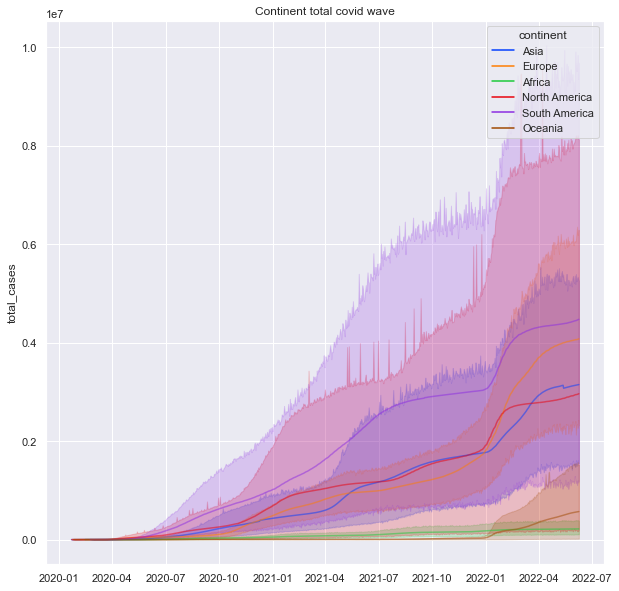

In [22]:
date_str = orig_df['date'].values
date_arr1 = []
for i in range(len(date_str)):
    date_arr1.append(parse(date_str[i]))
sns.lineplot(data=orig_df, x=date_arr1, y="total_cases",  hue="continent", palette="bright", alpha=0.5, sizes=(10, 1500))
# sns.color_palette("dark")
plt.title("Continent total covid wave")

**Conclusion :** According to this plot we have seen that South America has the highest Infected cases. 

# **Continent First wave**

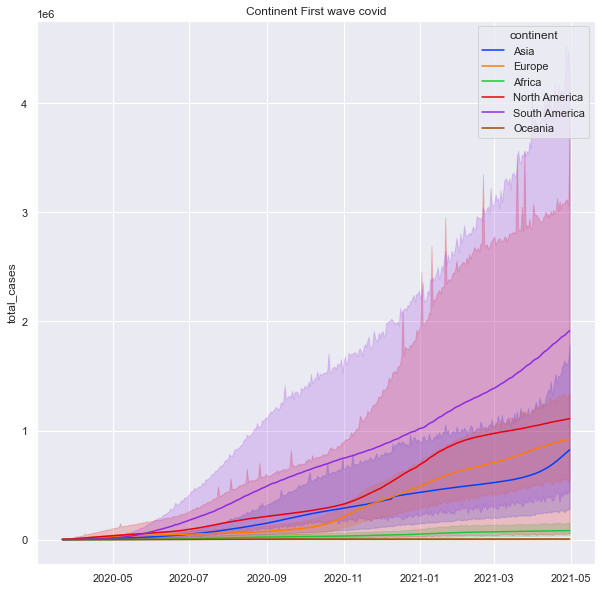

In [23]:
date_str4 = world_first_wave['date'].values
date_arr4 = []
for i in range(len(date_str3)):
    date_arr4.append(parse(date_str4[i]))
sns.lineplot(x = date_arr4  , y = world_first_wave["total_cases"], data = world_first_wave, hue="continent", palette="bright")
sns.set(rc={'figure.figsize':(10,10)})
plt.title("Continent First wave covid")
plt.show()

# **Continent Second wave**

# **INDIA TOTAL WAVES ANALYSIS**

In [24]:
df_ind = orig_df.loc[orig_df['iso_code'].str.contains('IND')]
df_ind

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
79701,IND,Asia,India,2020-01-30,1.0,1.0,NaN,NaN,NaN,NaN,...,1.9,20.6,59.55,0.53,69.66,0.645,NaN,NaN,NaN,NaN
79702,IND,Asia,India,2020-01-31,1.0,0.0,NaN,NaN,NaN,NaN,...,1.9,20.6,59.55,0.53,69.66,0.645,NaN,NaN,NaN,NaN
79703,IND,Asia,India,2020-02-01,1.0,0.0,NaN,NaN,NaN,NaN,...,1.9,20.6,59.55,0.53,69.66,0.645,NaN,NaN,NaN,NaN
79704,IND,Asia,India,2020-02-02,2.0,1.0,NaN,NaN,NaN,NaN,...,1.9,20.6,59.55,0.53,69.66,0.645,NaN,NaN,NaN,NaN
79705,IND,Asia,India,2020-02-03,3.0,1.0,NaN,NaN,NaN,NaN,...,1.9,20.6,59.55,0.53,69.66,0.645,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80558,IND,Asia,India,2022-06-05,43181335.0,4518.0,3655.143,524701.0,9.0,12.857,...,1.9,20.6,59.55,0.53,69.66,0.645,NaN,NaN,NaN,NaN
80559,IND,Asia,India,2022-06-06,43185049.0,3714.0,3851.714,524708.0,7.0,11.143,...,1.9,20.6,59.55,0.53,69.66,0.645,NaN,NaN,NaN,NaN
80560,IND,Asia,India,2022-06-07,43190282.0,5233.0,4207.143,524715.0,7.0,11.286,...,1.9,20.6,59.55,0.53,69.66,0.645,NaN,NaN,NaN,NaN
80561,IND,Asia,India,2022-06-08,43197522.0,7240.0,4711.143,524723.0,8.0,11.714,...,1.9,20.6,59.55,0.53,69.66,0.645,NaN,NaN,NaN,NaN


In [25]:
wave_india = df_ind[['date', 'total_cases']]
wave_india.head()

,date,total_cases
79701,2020-01-30,1.0
79702,2020-01-31,1.0
79703,2020-02-01,1.0
79704,2020-02-02,2.0
79705,2020-02-03,3.0


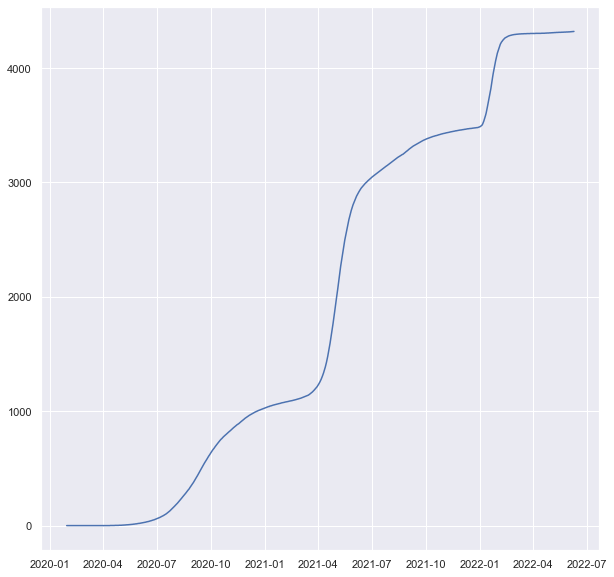

In [26]:
from dateutil.parser import parse
date_str = wave_india['date'].values
date_arr1 = []
for i in range(len(date_str)):
    date_arr1.append(parse(date_str[i]))
sns.lineplot(x = date_arr1  , y = wave_india["total_cases"].to_numpy(np.int64)//10000 ,data = wave_india )
sns.set(rc={'figure.figsize':(10,10)})

## India's Total Death vs Recover plot

# **India First Wave**

In [27]:
wave1 = orig_df.loc[orig_df['iso_code'].str.contains('IND')&(orig_df['date'] >='2020-03-22') & (orig_df['date'] < '2021-05-01')]
totalcases =  wave1['total_cases'].replace(np.nan,0).to_numpy(np.int64)//1000
#totalcase

In [28]:
from dateutil.parser import parse
date_st = wave1['date'].values
date_ar = []
for i in range(len(date_st)):
    date_ar.append(parse(date_st[i]))

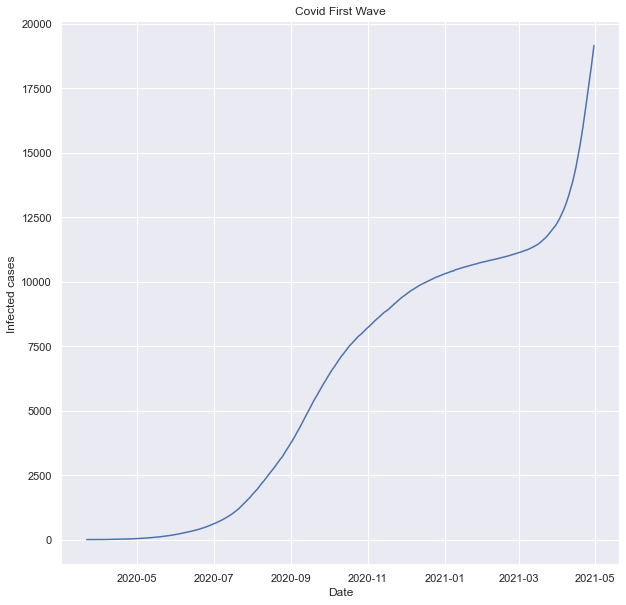

In [29]:
plt.plot(date_ar, totalcases)
plt.xlabel('Date')
plt.ylabel('Infected cases ')    
plt.title('Covid First Wave')
plt.show()

# **INDIA SECOND WAVE**

In [30]:
wave2 = orig_df.loc[orig_df['iso_code'].str.contains('IND')&(orig_df['date'] >='2021-06-01') & (orig_df['date'] < '2021-12-31')]
totalcase =  wave2['total_cases'].to_numpy(np.int64)//1000

In [31]:
from dateutil.parser import parse
date_s = wave2['date'].values
date_ar = []
for i in range(len(date_s)):
    date_ar.append(parse(date_s[i]))

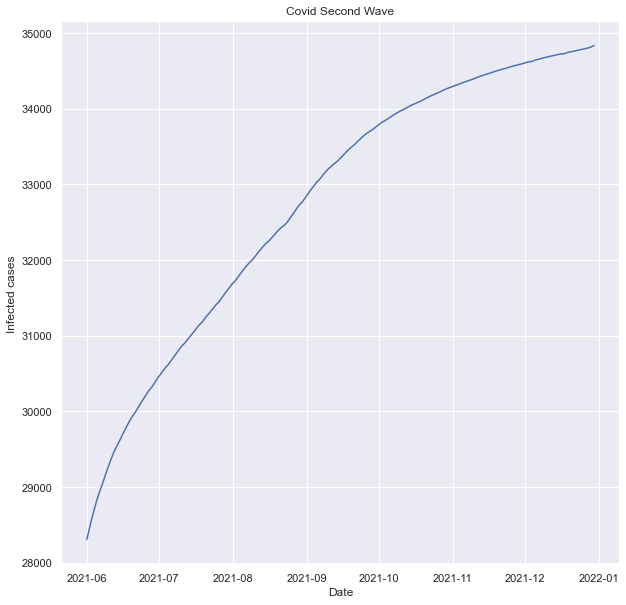

In [32]:
plt.plot(date_ar, totalcase)
plt.xlabel('Date')
plt.ylabel('Infected cases ')    
plt.title('Covid Second Wave')
plt.show()

# **INDIA THIRD WAVE**

In [33]:
wave3 = orig_df.loc[orig_df['iso_code'].str.contains('IND')&(orig_df['date'] >='2022-01-01') & (orig_df['date'] < '2022-3-15')]
totalcase =  wave3['total_cases'].to_numpy(np.int64)//1000

In [34]:
date_s = wave3['date'].values
date_ar = []
for i in range(len(date_s)):
    date_ar.append(parse(date_s[i]))

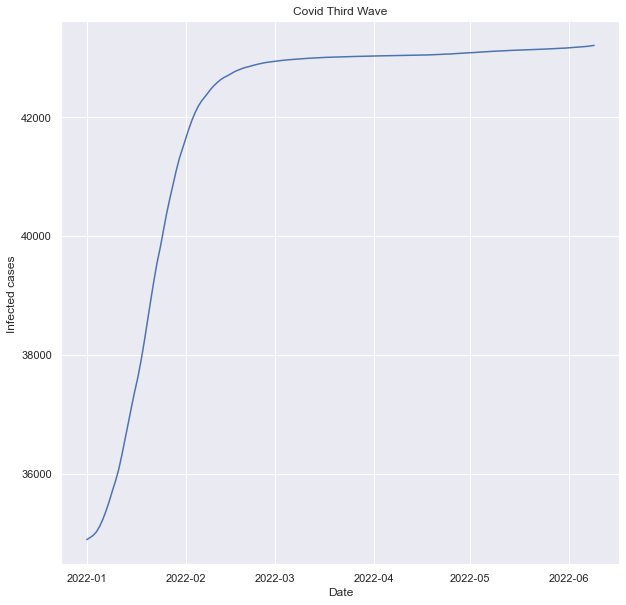

In [35]:
plt.plot(date_ar, totalcase)
plt.xlabel('Date')
plt.ylabel('Infected cases ')    
plt.title('Covid Third Wave')
plt.show()